# 텍스트빈도 분석/영문 문서 제목의 제목의 키워드 분석 프로젝트

## 1) 데이터 수집

- http://www.riss.kr/index.do(학술연구정보서비스)에 접속하여 BIGDATA 검색
- 통합검색 결과 페이지에서 [해외학술논문] 메뉴를 클릭
- '작성언어'를 [영어]로 선택하고 아래의 버튼을 클릭
- [Excel저장]을 선택 → 버튼을 클릭한 뒤 파일을 저장

## 2) 데이터 준비

### 1. 파일 병합

In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

In [2]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

all_files = glob.glob('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석/myCabinetExcelData*.xls')
all_files

['C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (1).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (2).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (3).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (4).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (5).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (6).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (7).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (8).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData (9).xls',
 'C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석\\myCabinetExcelData.xls']

- 프로젝트에 필요한 파이썬 패키지를 임포트
- 병합할 엑셀 파일 이름 10개를 리스트에 저장

In [3]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
...,...,...,...,...,...,...
95,NaN,96,A Detailed Review on the Prominent Compression...,"Anuradha, D.; Bhuvaneswari, S.",Springer Science + Business Media,2016
96,NaN,97,A Survey on Data Collection for Machine Learni...,"Roh, Yuji; Heo, Geon; Whang, Steven Euijong",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2021
97,NaN,98,An overview of online based platforms for shar...,"Chen, Yang; Wang, Zhong‐yi; Yuan, Gang; Huang,...",John Wiley & Sons Ltd,2017
98,NaN,99,Divide and recombine (D&R) data science projec...,"Tung, Wen-wen; Barthur, Ashrith; Bowers, Matth...",Springer Nature,2018


- 0개의 엑셀 파일 이름을 all_files 리스트에 저장
- 파일을 읽어서 하나의 데이터프레임으로 병합하고 CSV 파일에 저장

In [4]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
...,...,...,...,...,...,...
935,NaN,36,Analysis of Learner Timeout Behavior in Online...,"Le, Huixiao; Jia, Jiyou",Springer,2018
936,NaN,37,Hybrid Multi-Modal Deep Learning using Collabo...,"Kim, Joo-Chang; Chung, Kyungyong",IEEE,2020
937,NaN,38,Guest editorial – Special issue on hardware as...,"Mohanty, Saraju P.; Srivastava, Ashok; Hu, Shi...","Elsevier Science B.V., Amsterdam.",2017
938,NaN,39,Truncated Physical Model for Dynamic Sensor Ne...,"Matarazzo, Thomas J.; Pakzad, Shamim N.",ASCE AMERICAN SOCIETY OF CIVIL ENGINEERS,2016


- all_files 리스트에 있는 파일 이름을 이용해 엑셀 파일을 읽어오고pd.read_excel( ), 파일 내용을 all_files_data에추가하는append( ) 작업을 all_files 리스트의 원소 갯수만큼, 즉 10개 파일에 대해 반복
- all_files_data를 세로축을 기준으로axis=0 병합하여 all_files_data_concat 리스트 에 저장

In [5]:
all_files_data_concat.to_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석/riss_bigdata.csv', encoding = 'utf-8', index = False)

- all_files_data_concat을 CSV 파일로 저장

## 3) 데이터 전처리

In [6]:
all_title = all_files_data_concat['제목']
all_title

0            Clustering Big Spatiotemporal-Interval Data
1                Intelligent big data analysis: a review
2      Improved big data stock index prediction using...
3        Guest Editorial: Big Data Analytics and the Web
4        Guest Editorial: Big Data Analytics and the Web
                             ...                        
935    Analysis of Learner Timeout Behavior in Online...
936    Hybrid Multi-Modal Deep Learning using Collabo...
937    Guest editorial – Special issue on hardware as...
938    Truncated Physical Model for Dynamic Sensor Ne...
939    A Prototypical Reference Application of an IVI...
Name: 제목, Length: 940, dtype: object

- all_files_data_concat의 컬럼 중에서 분석에 사용할 ‘제목’ 컬럼만 추출해 all_title 에 저장

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\Jung Suk
[nltk_data]     Won\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jung Suk
[nltk_data]     Won\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jung Suk
[nltk_data]     Won\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- 전처리 작업을 위해 nltk.corpus에서 제공하는 영어 불용어stopwords.words("english")를 불러와서 저장그 후, 표제어 추출 작업을 제공하는 WordNetLemmatizer 객체를 생성

In [8]:
words = []
for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)
print(words) 

[['clustering', 'big', 'spatiotemporal', 'interval', 'data'], ['intelligent', 'big', 'data', 'analysis', 'review'], ['improved', 'big', 'data', 'stock', 'index', 'prediction', 'using', 'deep', 'learning', 'cnn', 'gru'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['guest', 'editorial', 'big', 'data', 'infrastructure'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['petuum', 'new', 'platform', 'distributed', 'machine', 'learning', 'big', 'data'], ['kvasir', 'scalable', 'provision', 'semantically', 'relevant', 'web', 'content', 'big', 'data', 'framework'], ['platform', 'big', 'data', 'analytics', 'distributed', 'scale', 'storage', 'system'], ['nosql', 'database', 'big', 'data'], ['palopro', 'platform', 'kn

- all_title의 제목에 대해 정규식으로 만든 규칙을 적용하여 알파벳 으로 시작하지 않는 단어"[^a-zA-Z]+"는 공백으로치환하여re.sub( ) 제거하고, 소문자로 정규화 하고lower( ), 단어 토큰화word_tokenize( )를 함그 후, 불용어stopWords를 제거한 후에 표제어 추출lemmatize(w)을 한다

In [9]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['clustering', 'big', 'spatiotemporal', 'interval', 'data', 'intelligent', 'big', 'data', 'analysis', 'review', 'improved', 'big', 'data', 'stock', 'index', 'prediction', 'using', 'deep', 'learning', 'cnn', 'gru', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'guest', 'editorial', 'big', 'data', 'infrastructure', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'petuum', 'new', 'platform', 'distributed', 'machine', 'learning', 'big', 'data', 'kvasir', 'scalable', 'provision', 'semantically', 'relevant', 'web', 'content', 'big', 'data', 'framework', 'platform', 'big', 'data', 'analytics', 'distributed', 'scale', 'storage', 'system', 'nosql', 'database', 'big', 'data', 'palopro', 'platform', 'knowledge', 'extraction', 'bi

- 전처리가 끝난 words는 2차원 리스트이므로 reduce() 함수를 사용하여 1차원 리스트로 변환

## 4) 데이터 탐색 및 분석 모델 구축

### 2-1 단어 빈도 탐색

In [10]:
count = Counter(words2)
count

Counter({'clustering': 11,
         'big': 1015,
         'spatiotemporal': 2,
         'interval': 4,
         'data': 1141,
         'intelligent': 14,
         'analysis': 82,
         'review': 29,
         'improved': 6,
         'stock': 4,
         'index': 8,
         'prediction': 15,
         'using': 59,
         'deep': 11,
         'learning': 41,
         'cnn': 2,
         'gru': 2,
         'guest': 16,
         'editorial': 19,
         'analytics': 99,
         'web': 12,
         'infrastructure': 13,
         'scholar': 6,
         'discovery': 18,
         'collaboration': 9,
         'speed': 2,
         'unveiling': 2,
         'storage': 12,
         'distribution': 13,
         'sub': 2,
         'datasets': 3,
         'petuum': 2,
         'new': 35,
         'platform': 35,
         'distributed': 22,
         'machine': 20,
         'kvasir': 2,
         'scalable': 15,
         'provision': 3,
         'semantically': 3,
         'relevant': 2,
         'c

- words2 리스트에 있는 단어별로 출현 횟수를 계산하여 딕셔너리 객체인 count를 생성

In [11]:
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1141
big : 1015
analytics : 99
based : 90
analysis : 82
using : 59
system : 52
driven : 51
model : 43
approach : 43
application : 42
learning : 41
challenge : 40
bigdata : 40
new : 35
platform : 35
framework : 35
earth : 34
management : 33
science : 30
review : 29
processing : 29
network : 28
health : 28
algorithm : 28
cloud : 27
technology : 25
smart : 25
service : 24
opportunity : 24
research : 24
issue : 23
era : 23
distributed : 22
real : 22
computing : 21
mining : 21
use : 21
perspective : 21
machine : 20
time : 20
performance : 20
small : 20
process : 20
world : 20
editorial : 19
survey : 19
information : 19
discovery : 18
business : 18


- 출현 횟수가 많은 상위 50개 단어count.most_common(50) 중에서 단어 길이가 1보다 큰 것만 word_count 딕셔너리에저장한 후 출력

### 2-2 단어 빈도 히스토그램

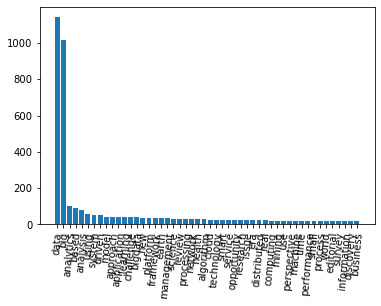

In [12]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

- 히스토그램을 그리기 위해 matplotlib.pyplot을 사용, 히스토그램의 크기figure( )를 지정하고x축 레이블xlabel( )과 y축 레이블ylabel( )을 지정, 상위 50개만 저장한 word_count 딕셔너리에서x축 값으로 사용할 sorted_Keys와 y축 값으로 사용할 sorted_Values를 역순으로 정렬하여reverse=True 준비x축 눈금plt.xticks은 sorted_Keys 리스트의 값(상위 50개 단어)을 순서대로 사용설정 사항을 적용하여 히스토그램을 그림

In [13]:
all_files_data_concat['doc_count'] = 0 
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year

,출판일,doc_count
0,2003,1
1,2004,1
2,2011,5
3,2012,18
4,2013,51
5,2014,123
6,2015,107
7,2016,131
8,2017,142
9,2018,130


- all_files_data_concat에 doc_count 컬럼을 추가한 뒤 ‘출판일’ 컬럼을 기준 으로 그룹을 만들고groupby( ), 그룹별 데이터 개수count( )를 doc_count 컬럼에 저장하여 summary_year 리스트를 생성

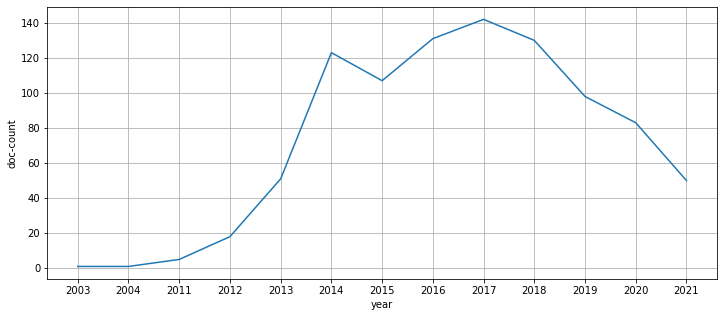

In [14]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

- summary_year의 doc_count 컬럼을 차트의 y축으로 설정하고plt.plot( ), ‘출판일’ 컬럼은 x축으로 설정하여plt.xticks( ) 차트를 그림

### 3-2 워드클라우드

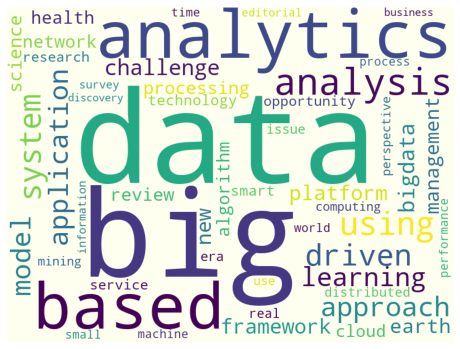

In [15]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

- 워드클라우드에서 처리할 불용어를 설정하고set(STOPWORDS), 워드클라우드 객체를 생성 WordCloud( )워드클라우드 객체인 wc에 word_count 데이터를 담아서wc.generate_ from_frequencies( ) cloud 객체를 생성 생성한 워드클라우드는 matplotlib.pyplot을 사용하여 나타냄

In [16]:
cloud.to_file("C:/Users/Jung Suk Won/파이썬/데이터과학및분석/04 텍스트 빈도 분석/riss_bigdata_wordCloud.jpg")

- 워드클라우드를 jpg 파일로 저장